LIB Table with Genre and Year

In [4]:
import pandas as pd
import numpy as np

import configparser
config = configparser.ConfigParser()
config.read("env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
local_lib = config['DEFAULT']['local_lib']


data_prefix = 'entrepreneur'
#table_dir =  f'{data_home}/{data_prefix}'
OHCO = ['screenplay_id', 'sent_num', 'token_num']
# PARA = OHCO[:4] # Paragraphs
# SENT = OHCO[:5] # Sentences
BAG = OHCO[:1]
# BAG = SENT


In [38]:
LIB = pd.read_csv(f'{output_dir}/{data_prefix}-LIB.csv')
WV = pd.read_csv(f'{output_dir}/{data_prefix}-WV.csv')

In [7]:
LIB

,screenplay_id,source_file_path,raw_title,scene_regex,genre,year,title
0,joy,/sfs/weka/scratch/gec2tp/data/entrepreneur/Joy...,Joy,^(INT\.|EXT\.|INT/EXT\.|EXT/INT\.|SCENE\s+\d{1...,comdey/drama,2015,Joy
1,steve_jobs,/sfs/weka/scratch/gec2tp/data/entrepreneur/Ste...,Steve Jobs,^(INT\.|EXT\.|INT/EXT\.|EXT/INT\.|SCENE\s+\d{1...,drama/history,2015,Steve Jobs
2,the_big_short,/sfs/weka/scratch/gec2tp/data/entrepreneur/The...,The Big Short,^(INT\.|EXT\.|INT/EXT\.|EXT/INT\.|SCENE\s+\d{1...,comedy/thriller,2015,The Big Short
3,the_founder,/sfs/weka/scratch/gec2tp/data/entrepreneur/The...,The Founder,^(INT\.|EXT\.|INT/EXT\.|EXT/INT\.|SCENE\s+\d{1...,gothic,2016,The Founder
4,the_help,/sfs/weka/scratch/gec2tp/data/entrepreneur/The...,The Help,^(INT\.|EXT\.|INT/EXT\.|EXT/INT\.|SCENE\s+\d{1...,drama/historical_fiction,2011,The Help
5,the_social_network,/sfs/weka/scratch/gec2tp/data/entrepreneur/The...,The Social Network,^(INT\.|EXT\.|INT/EXT\.|EXT/INT\.|SCENE\s+\d{1...,drama/historical_fiction,2009,The Social Network


In [12]:
DOCS = pd.read_csv(f'{output_dir}/{data_prefix}-DOC-PARAS.csv')
DOCS

,screenplay_id,scene_id,para_num,n_tokens,n_types,pkr,raw_title
0,joy,1,0,11,11,1.000000,Joy
1,joy,2,0,241,149,0.618257,Joy
2,joy,4,0,20,17,0.850000,Joy
3,joy,6,0,24,20,0.833333,Joy
4,joy,7,0,45,38,0.844444,Joy
...,...,...,...,...,...,...,...
4289,the_social_network,573,1,168,107,0.636905,The Social Network
4290,the_social_network,574,0,1,1,1.000000,The Social Network
4291,the_social_network,574,1,228,148,0.649123,The Social Network
4292,the_social_network,575,0,1,1,1.000000,The Social Network


Want to Add a Little More to Docs For Visualizations

In [32]:
#DOCS = DOCS.reset_index().set_index(["screenplay_id", "scene_id"])
#LIB = LIB.set_index("screenplay_id")
DOCS['genre'] = DOCS.apply(lambda x: f"{LIB.loc[x.name[0]].genre}", axis=1)
DOCS['year'] = DOCS.apply(lambda x: f"{LIB.loc[x.name[0]].year}", axis=1)
#DOCS['n_chars'] = DOCS.doc_str.str.len()
DOCS

para_num  n_tokens  n_types       pkr  \
screenplay_id      scene_id                                          
joy                1                0        11       11  1.000000   
                   2                0       241      149  0.618257   
                   4                0        20       17  0.850000   
                   6                0        24       20  0.833333   
                   7                0        45       38  0.844444   
...                               ...       ...      ...       ...   
the_social_network 573              1       168      107  0.636905   
                   574              0         1        1  1.000000   
                   574              1       228      148  0.649123   
                   575              0         1        1  1.000000   
                   575              1        50       41  0.820000   

                                      raw_title                     genre  \
screenplay_id      scene_id                                                 
joy                1                        Joy              comdey/drama   
                   2                        Joy              comdey/drama   
                   4                        Joy              comdey/drama   
                   6                        Joy              comdey/drama   
                   7                        Joy              comdey/drama   
...                                         ...                       ...   
the_social_network 573       The Social Network  drama/historical_fiction   
                   574       The Social Network  drama/historical_fiction   
                   574       The Social Network  drama/historical_fiction   
                   575       The Social Network  drama/historical_fiction   
                   575       The Social Network  drama/historical_fiction   

                             year  
screenplay_id      scene_id        
joy                1         2015  
                   2         2015  
                   4         2015  
                   6         2015  
                   7         2015  
...                           ...  
the_social_network 573       2009  
                   574       2009  
                   574       2009  
                   575       2009  
                   575       2009  

[4294 rows x 7 columns]

Load in WV FOR RIFF 1

### RIFF 1

<Figure size 640x480 with 0 Axes>

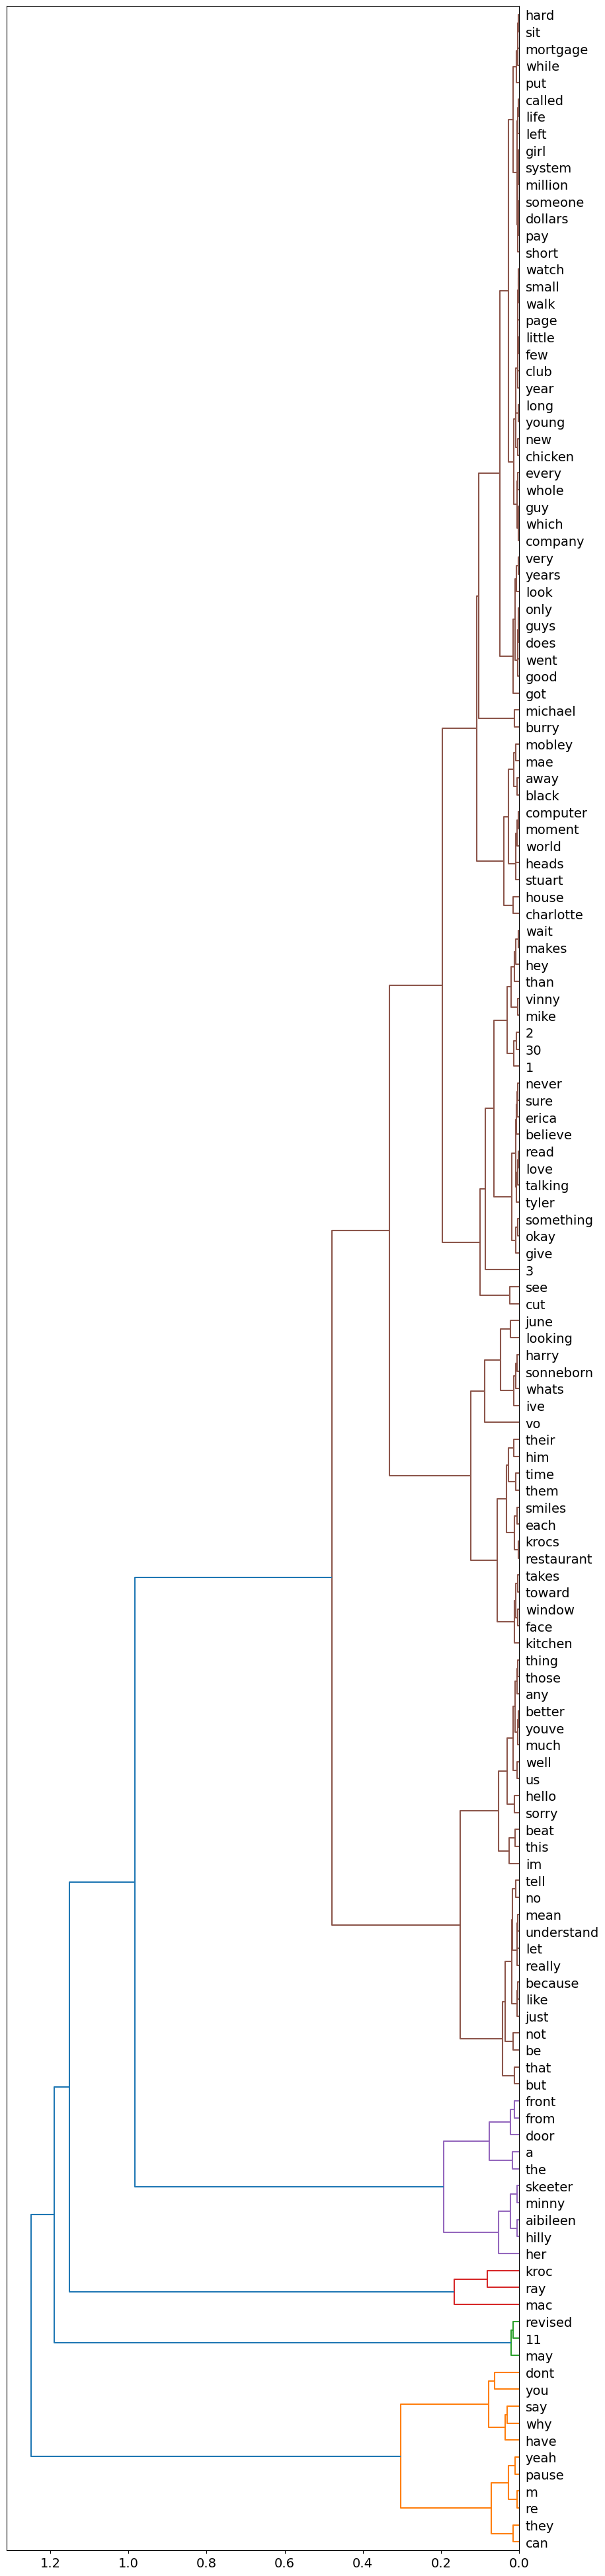

In [45]:
import plotly_express as px
import seaborn as sns

import sys
sys.path.append(local_lib)
from hac import HAC

WV=WV.set_index("term_str")

HAC(WV.sample(150)).plot()

### RIFF 2

In [47]:
joy_sentiment = pd.read_csv(f'{output_dir}/{data_prefix}-joy_sentiment.csv')
tsn_sentiment = pd.read_csv(f'{output_dir}/{data_prefix}-tsn_sentiment.csv')
tsn_sentiment

,scene_id,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment,sent_str,neg,neu,pos,compound
0,1,0.042488,0.024713,0.000000,0.014638,0.024713,0.021151,0.009896,0.033594,-0.040161,anger dangerous delusional fall good row sing ...,0.384,0.282,0.333,-0.2263
1,2,0.007405,0.011428,0.000000,0.000000,0.019157,0.000000,0.011428,0.025296,0.029319,birthday chairman diverse important row true,0.000,0.465,0.535,0.5574
2,3,0.028972,0.006404,0.013302,0.013302,0.014562,0.013302,0.006404,0.014562,-0.008006,friend hit ill money,0.350,0.250,0.400,0.1027
3,4,0.000000,0.016588,0.000000,0.000000,0.016588,0.024233,0.000000,0.015413,0.007768,blindness fun president,0.000,0.377,0.623,0.5106
4,5,0.015360,0.017747,0.015360,0.015360,0.000000,0.015360,0.000000,0.000000,-0.033107,ill wait,0.737,0.263,0.000,-0.4215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,569,0.033699,0.000000,0.033699,0.063233,0.000000,0.033699,0.000000,0.000000,-0.063233,ill panic,1.000,0.000,0.000,-0.7269
257,572,0.017136,0.027452,0.017136,0.029947,0.008223,0.017136,0.021034,0.017850,-0.003214,agreement bad devil perjury present university,0.675,0.125,0.200,-0.8225
258,573,0.011794,0.013119,0.012389,0.022532,0.003896,0.018063,0.007183,0.018912,0.007743,agreement angry defendant dire lost pay police...,0.549,0.275,0.176,-0.7003
259,574,0.004878,0.014244,0.004878,0.009895,0.007327,0.003827,0.000000,0.016828,0.006642,agreement asshole friend pay problem title uni...,0.283,0.276,0.441,0.5106


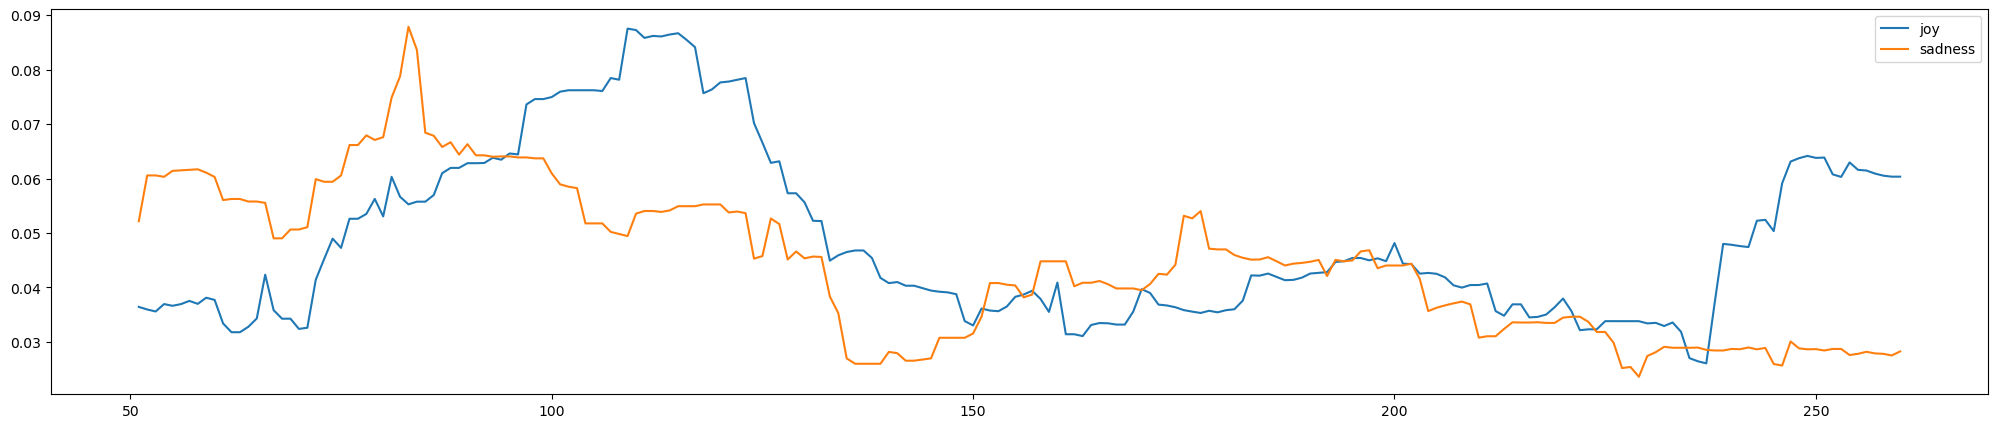

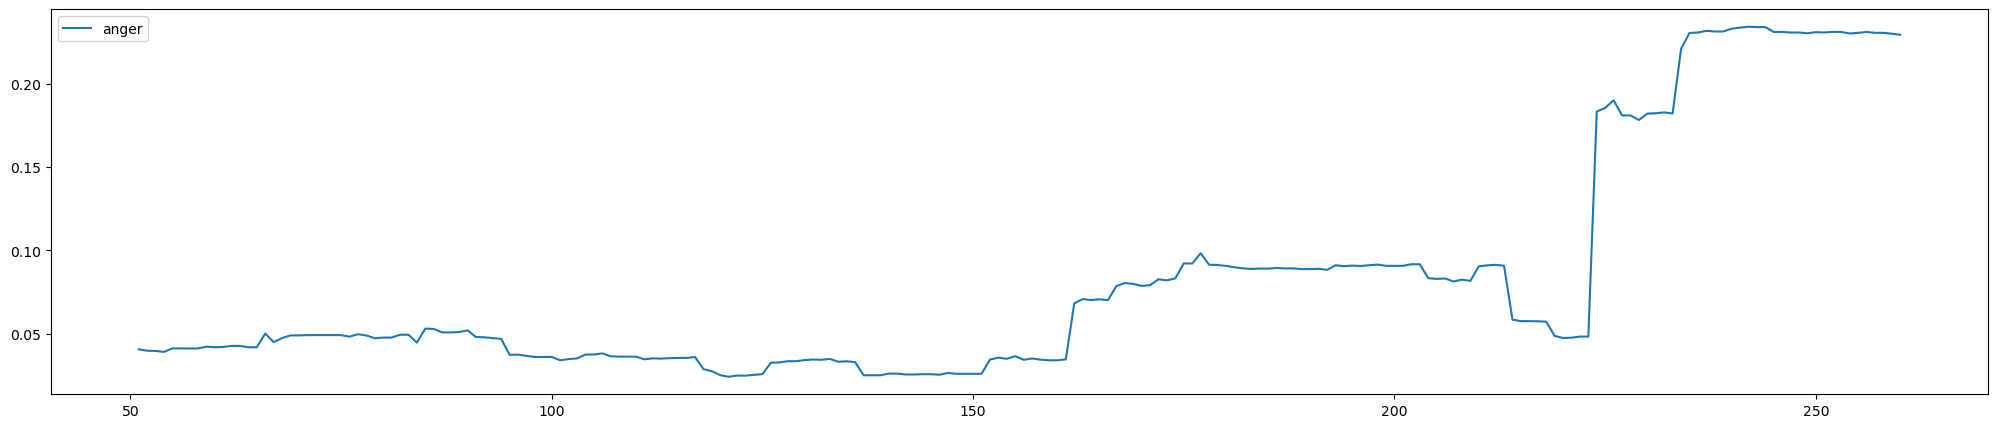

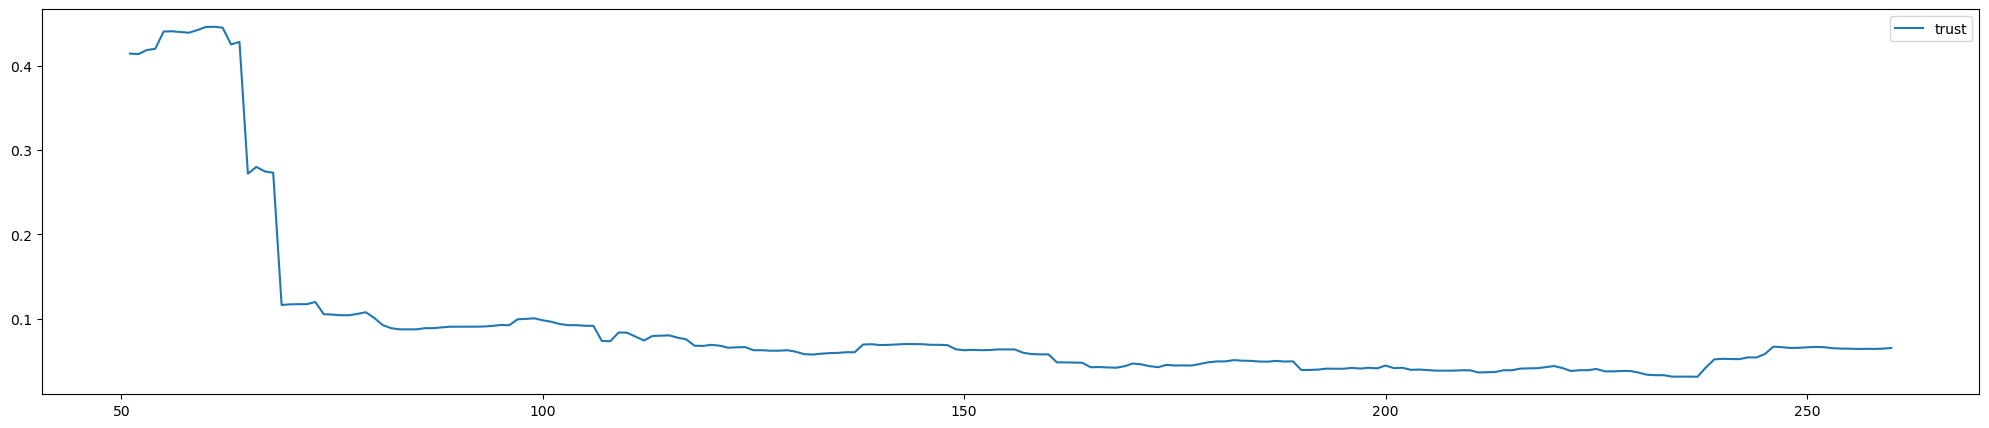

In [50]:
w = int(tsn_sentiment.shape[0] / 5)
tsn_sentiment[['joy','sadness']].rolling(w).mean().plot(figsize=(25,5));
tsn_sentiment[['anger']].rolling(w).mean().plot(figsize=(25,5));
tsn_sentiment[['trust']].rolling(w).mean().plot(figsize=(25,5));


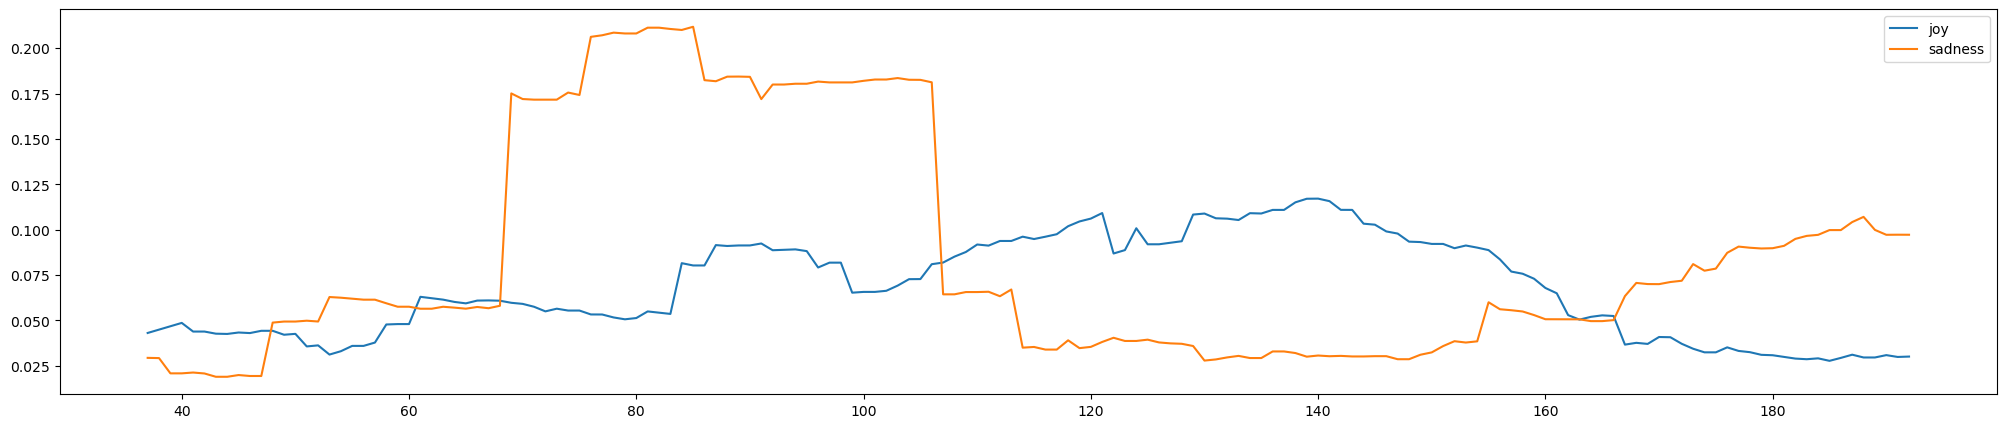

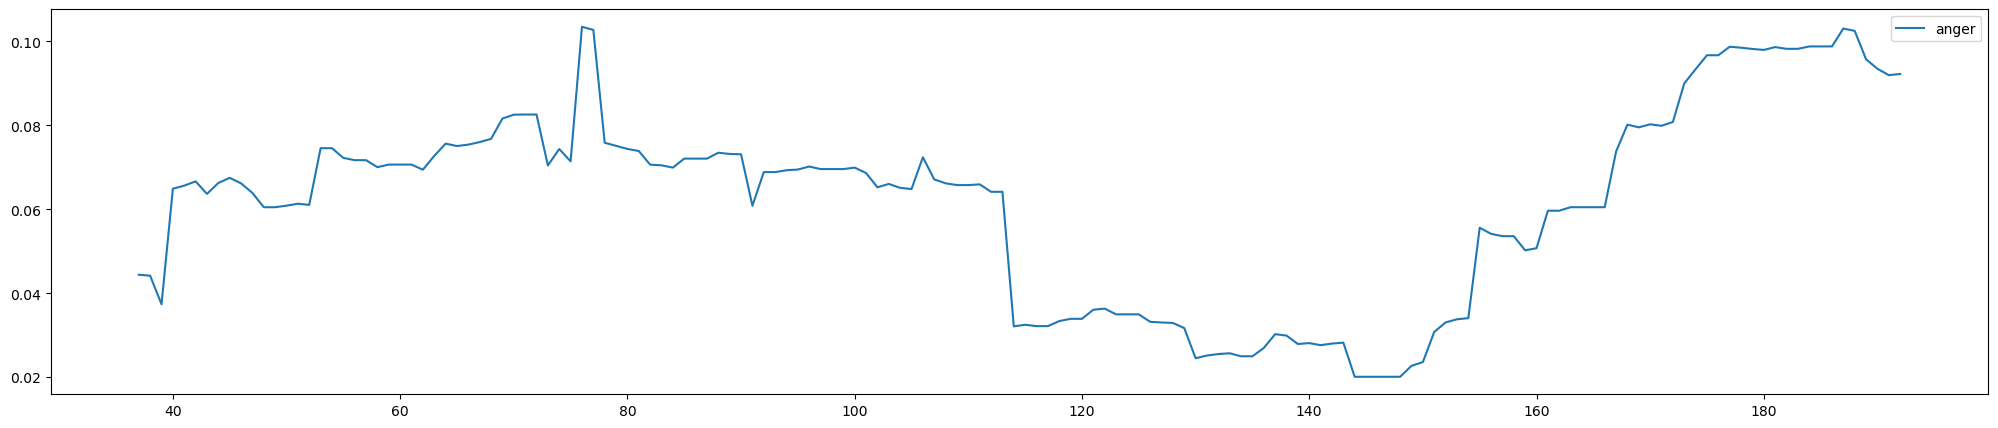

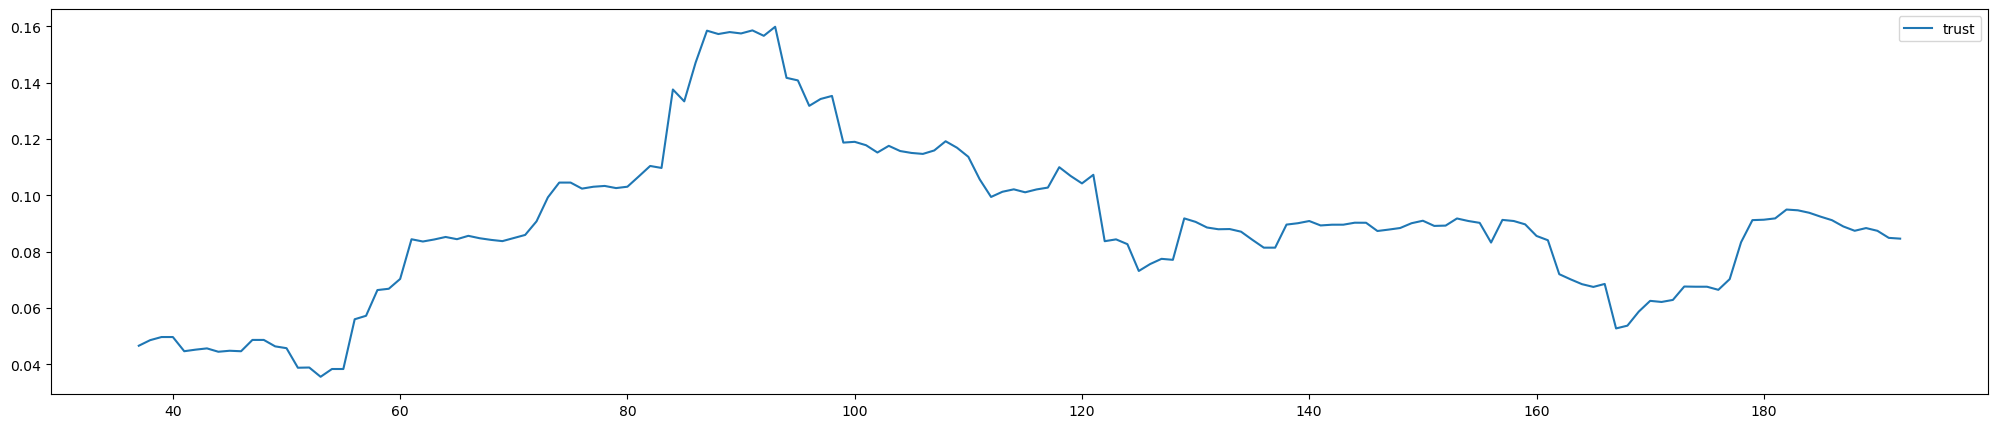

In [51]:
w = int(joy_sentiment.shape[0] / 5)
joy_sentiment[['joy','sadness']].rolling(w).mean().plot(figsize=(25,5));
joy_sentiment[['anger']].rolling(w).mean().plot(figsize=(25,5));
joy_sentiment[['trust']].rolling(w).mean().plot(figsize=(25,5));
